In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [2]:
data_path = 'imputed 2007-2023 (1).csv'
df = pd.read_csv(data_path, parse_dates=['Date'])

In [3]:
# Moving Average
def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

In [4]:
window_size = 30
train_size = int(len(df) * 0.9)
train_data = df['close'][:train_size]
test_data = df['close'][train_size:]


In [5]:
train_ma = moving_average(train_data, window_size)
test_ma = moving_average(test_data, window_size)


In [10]:
# Evaluate performance
def evaluate_performance(actual, predicted):
    actual = actual[~np.isnan(predicted)]
    predicted = predicted[~np.isnan(predicted)]
    mape = mean_absolute_percentage_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mape, rmse


In [11]:

train_mape, train_rmse = evaluate_performance(train_data, train_ma)
test_mape, test_rmse = evaluate_performance(test_data, test_ma)

print(f'Train MAPE: {train_mape}, Train RMSE: {train_rmse}')
print(f'Test MAPE: {test_mape}, Test RMSE: {test_rmse}')

Train MAPE: 0.04676370737033637, Train RMSE: 54.93472996224136
Test MAPE: 0.0684859130841868, Test RMSE: 53.939265283644154


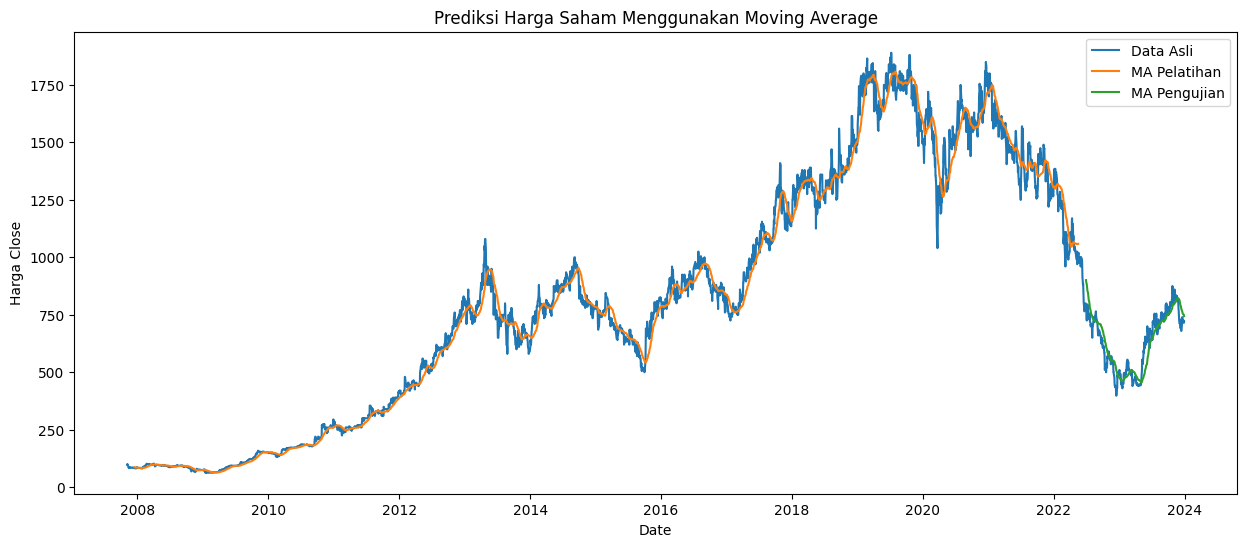

In [12]:
# Plot results
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['close'], label='Data Asli')
plt.plot(df['Date'][:train_size], train_ma, label='MA Pelatihan')
plt.plot(df['Date'][train_size:], test_ma, label='MA Pengujian')
plt.xlabel('Date')
plt.ylabel('Harga Close')
plt.title('Prediksi Harga Saham Menggunakan Moving Average')
plt.legend()
plt.show()

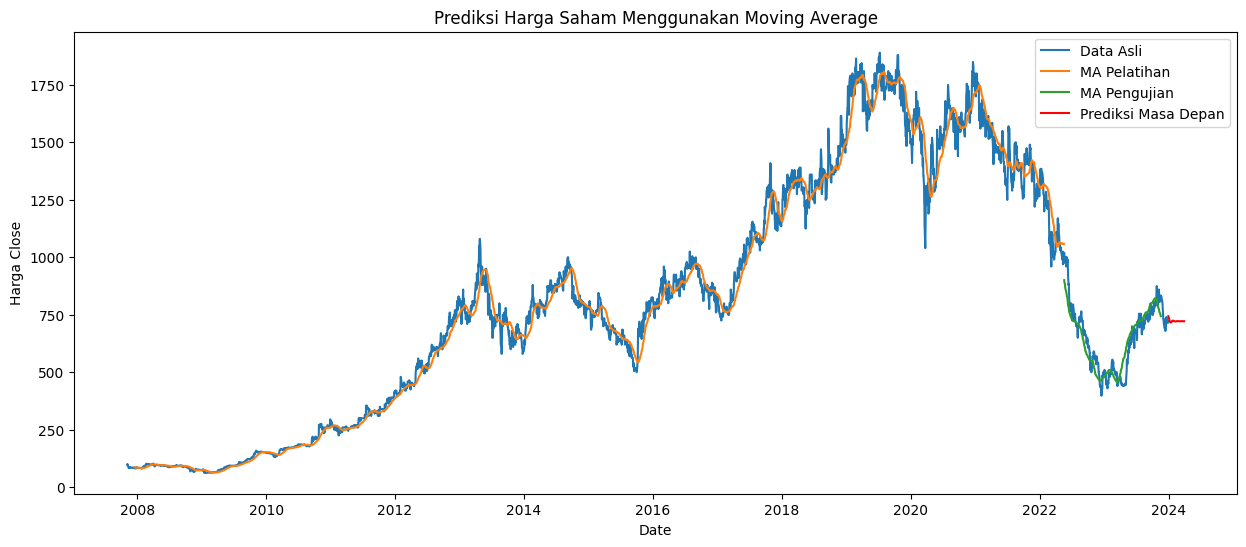

Hasil prediksi telah disimpan ke dalam file "ma_prediction_90_days.csv".


In [18]:
# Predict future prices using moving average
last_window = test_data[-window_size:]
future_predictions = []

for i in range(90):  # Ganti 30 dengan 90 untuk prediksi 90 hari ke depan
    future_price = last_window.mean()
    future_predictions.append(future_price)
    last_window = pd.concat([last_window[1:], pd.Series([future_price])], ignore_index=True)

# Create a DataFrame for future predictions
future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=90)  # Ganti 30 dengan 90
future_df = pd.DataFrame({'Date': future_dates, 'Future_Predict': future_predictions})

# Combine actual data and future predictions into a DataFrame
result_df = df[['Date', 'close']].copy()
result_df.columns = ['Date', 'Actual']
result_df['Train_Predict'] = np.nan
result_df['Test_Predict'] = np.nan

train_predict_end = len(train_ma.dropna())
test_predict_end = len(train_ma.dropna()) + len(test_ma.dropna())

result_df.iloc[window_size:train_predict_end + window_size, result_df.columns.get_loc('Train_Predict')] = train_ma.dropna().values
result_df.iloc[train_predict_end + window_size:test_predict_end + window_size, result_df.columns.get_loc('Test_Predict')] = test_ma.dropna().values

result_df = pd.concat([result_df, future_df], ignore_index=True)

# Plot actual data, predictions, and future predictions
plt.figure(figsize=(15, 6))
plt.plot(result_df['Date'], result_df['Actual'], label='Data Asli')
plt.plot(result_df['Date'], result_df['Train_Predict'], label='MA Pelatihan')
plt.plot(result_df['Date'], result_df['Test_Predict'], label='MA Pengujian')
plt.plot(future_df['Date'], future_df['Future_Predict'], label='Prediksi Masa Depan', color='red')
plt.xlabel('Date')
plt.ylabel('Harga Close')
plt.title('Prediksi Harga Saham Menggunakan Moving Average')
plt.legend()
plt.show()

result_df.to_csv('ma_prediction_90_days.csv', index=False)
print('Hasil prediksi telah disimpan ke dalam file "ma_prediction_90_days.csv".')